#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

#Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7567 files belonging to 8 classes.


#Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7545 files belonging to 8 classes.


#Building Model

In [ ]:

cnn = tf.keras.models.Sequential()

#Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [ ]:

cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:

cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))


#Building Convolution Layer

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
237/237 [==============================] - 272s 1s/step - loss: 3.9271 - accuracy: 0.4615 - val_loss: 0.7804 - val_accuracy: 0.7474
Epoch 2/32
237/237 [==============================] - 280s 1s/step - loss: 0.7727 - accuracy: 0.7316 - val_loss: 0.3549 - val_accuracy: 0.8757
Epoch 3/32
237/237 [==============================] - 243s 1s/step - loss: 0.4453 - accuracy: 0.8540 - val_loss: 0.1569 - val_accuracy: 0.9504
Epoch 4/32
237/237 [==============================] - 264s 1s/step - loss: 0.3273 - accuracy: 0.8869 - val_loss: 0.1288 - val_accuracy: 0.9597
Epoch 5/32
237/237 [==============================] - 264s 1s/step - loss: 0.1979 - accuracy: 0.9321 - val_loss: 0.1096 - val_accuracy: 0.9690
Epoch 6/32
237/237 [==============================] - 268s 1s/step - loss: 0.1742 - accuracy: 0.9420 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 7/32
237/237 [==============================] - 247s 1s/step - loss: 0.1353 - accuracy: 0.9551 - val_loss: 0.0584 - val_accuracy: 0.9797

#Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

237/237 [==============================] - 57s 236ms/step - loss: 0.0248 - accuracy: 0.9937
Training accuracy: 0.9936566948890686


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


236/236 [==============================] - 57s 238ms/step - loss: 0.0248 - accuracy: 0.9936
Validation accuracy: 0.9936381578445435


#Saving Model

In [ ]:

cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

training_history.history #Return Dictionary of history

{'loss': [3.9270615577697754,
  0.7727115750312805,
  0.44525158405303955,
  0.32732611894607544,
  0.1979358196258545,
  0.1741815209388733,
  0.13533836603164673,
  0.15850457549095154,
  0.09504224359989166,
  0.0899100974202156,
  0.07406041771173477,
  0.08607829362154007,
  0.07880470901727676,
  0.12483957409858704,
  0.06385061144828796,
  0.11203642934560776,
  0.038291361182928085,
  0.08718067407608032,
  0.14270660281181335,
  0.14048005640506744,
  0.05462389066815376,
  0.03251964598894119,
  0.05085409805178642,
  0.06807834655046463,
  0.094742551445961,
  0.05349761247634888,
  0.03825968876481056,
  0.061830032616853714,
  0.07407847791910172,
  0.0750933364033699,
  0.05005570873618126,
  0.08578838407993317],
 'accuracy': [0.46147745847702026,
  0.7315977215766907,
  0.8539711833000183,
  0.8868772387504578,
  0.9320734739303589,
  0.9419849514961243,
  0.955068051815033,
  0.9525571465492249,
  0.9730408191680908,
  0.9717193245887756,
  0.9783269166946411,
  0.972

In [ ]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 99.36381578445435 %


#Accuracy Visualization

#Training Visualization


In [ ]:
#training_history.history['accuracy']

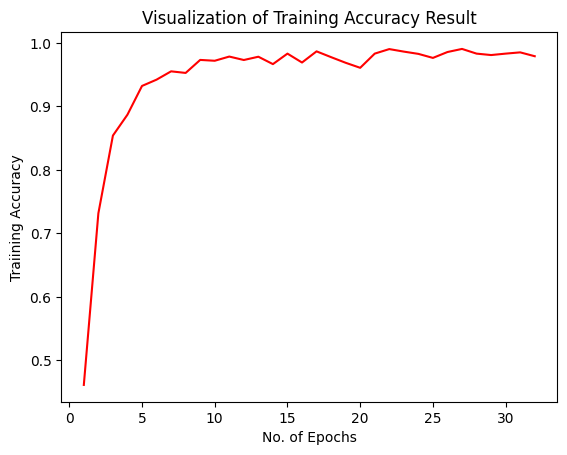

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation Accuracy

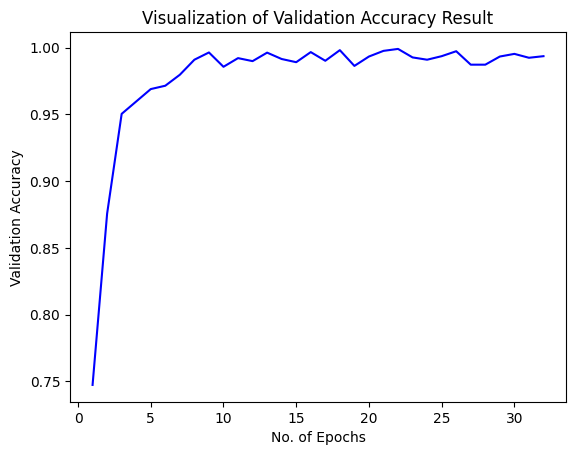

In [ ]:

plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (3)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 7527 files belonging to 8 classes.


In [ ]:


test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

236/236 [==============================] - 739s 3s/step - loss: 0.0248 - accuracy: 0.9936
Test accuracy: 0.9936229586601257
